# Sidney House Prices - EDA

## Abstract

The goal is to perform an **Exploratory Data Analysis (EDA)** to understand property price patterns, trends over time, and relationships between property characteristics.


## Resources

* Dataset of Sydney property prices from 2000 to 2019.

* Libraries: pandas for EDA, matplotlib and seaborn for data visualization.

## Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

Variables:

* `Date`: date when the property was sold.
* `Id`: a unique identifier assigned to each property record.
* `suburb`: suburb or neighborhood where the property is located.
* `postalCode`: postal code corresponding to the property’s suburb.
* `sellPrice`: sale price of the property (in Australian dollars).
* `bed`: number of bedrooms in the property.
* `bath`: number of bathrooms in the property.
* `car`: number of parking spaces available (garage or driveway).
* `propType`: type of property (e.g., house, unit, townhouse).

In [43]:
df = pd.read_csv("./SydneyHousePrices.csv")

In [44]:
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [45]:
# Create a DataFrame with an information resume
summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().mean() * 100).round(2)
}).reset_index(drop=True)
summary

,Column,Data Type,Non-Null Count,Null Count,Null %
0,Date,object,199504,0,0.00
1,Id,int64,199504,0,0.00
2,suburb,object,199504,0,0.00
3,postalCode,int64,199504,0,0.00
4,sellPrice,int64,199504,0,0.00
5,bed,float64,199350,154,0.08
6,bath,int64,199504,0,0.00
7,car,float64,181353,18151,9.10
8,propType,object,199504,0,0.00


The dataset contains **199,504 property records** and **9 variables**. Most columns have complete data, with very few missing values. Specifically, the *bed* column has only **154 missing values (0.08%)**, while the *car* column shows a higher proportion of missing data, with **18,151 nulls (9.10%)**. 
Currently, the *bed* and *car* columns are stored as floats, but they should be converted to integer (int64) since they represent discrete counts. Similarly, the *Date* column is stored as an object and should be transformed into a datetime format to enable time-based analysis. Overall, the dataset has a high data quality and is ready for cleaning and exploratory analysis.

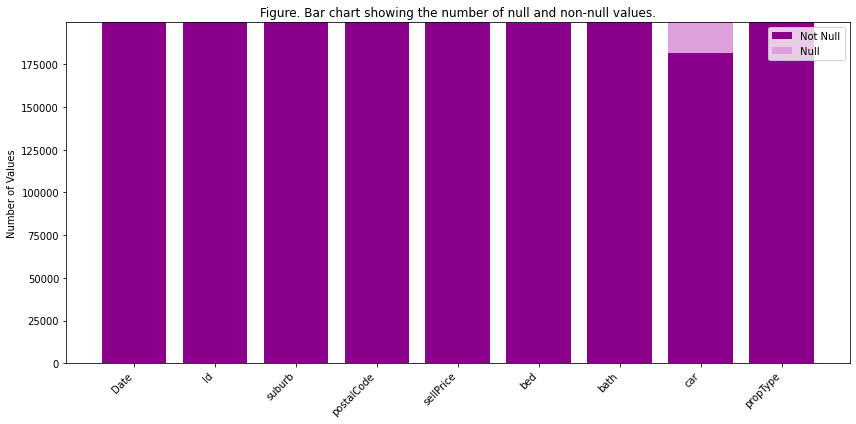

In [46]:
# Null and not null values
null_counts = df.isnull().sum()
not_null_counts = df.shape[0] - null_counts

# Create figure
plt.figure(figsize=(12, 6))
x = range(len(df.columns))
plt.bar(x, not_null_counts, label='Not Null', color='darkmagenta')
plt.bar(x, null_counts, bottom=not_null_counts, label='Null', color='plum')
plt.xticks(x, df.columns, rotation=45, ha='right')
plt.ylabel('Number of Values')
plt.title('Figure. Bar chart showing the number of null and non-null values.')
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
# Unique values
for col in df.columns:
    print(f"'{col}' has {df[col].nunique()} unique values.")

'Date' has 4683 unique values.
'Id' has 199504 unique values.
'suburb' has 685 unique values.
'postalCode' has 235 unique values.
'sellPrice' has 8439 unique values.
'bed' has 30 unique values.
'bath' has 24 unique values.
'car' has 26 unique values.
'propType' has 8 unique values.


Variables:

Numerical (quantitative):
- sellPrice
- bed
- bathroom
- car

Categorical:
- suburb
- Postal Code
- property type

### Categorical variables

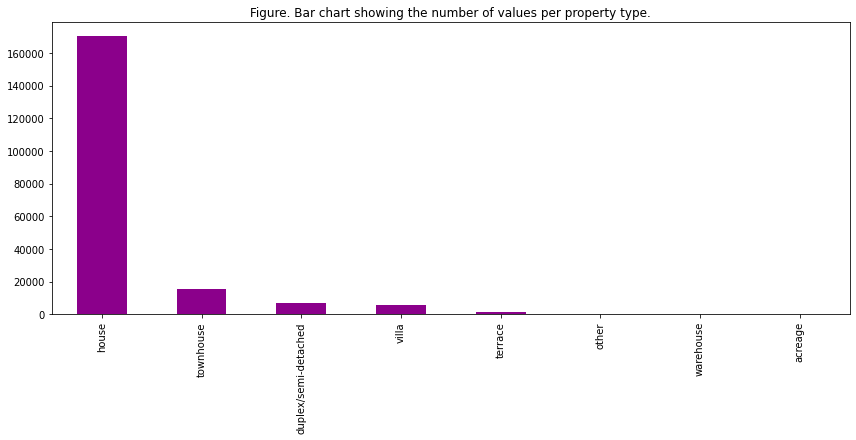

In [48]:
# propType
plt.figure(figsize=(12,6))
df['propType'].value_counts().plot.bar(color='darkmagenta') 
plt.tight_layout()
plt.title('Figure. Bar chart showing the number of values per property type.')
plt.show()

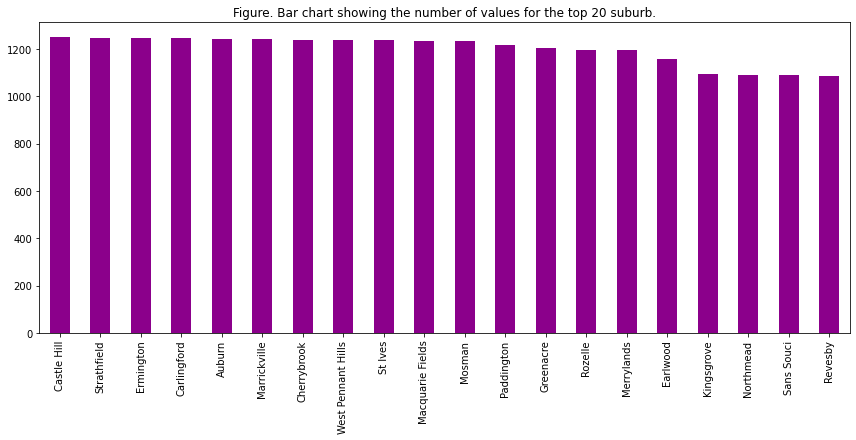

In [49]:
# suburb
plt.figure(figsize=(12,6))
df['suburb'].value_counts().head(20).plot.bar(color='darkmagenta')
plt.tight_layout()
plt.title('Figure. Bar chart showing the number of values for the top 20 suburb.')
plt.show()

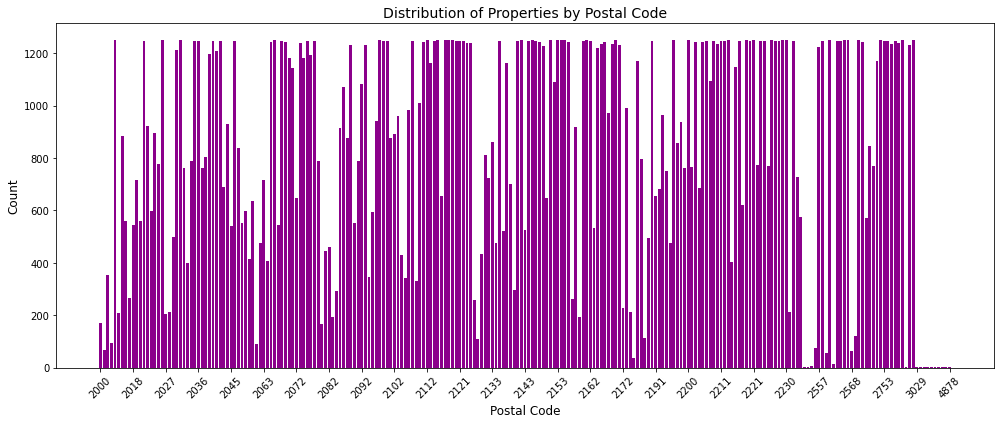

In [50]:
# postalCode
postal_counts = df['postalCode'].value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.bar(postal_counts.index.astype(str), postal_counts.values, color='darkmagenta', width=0.8)
plt.title('Distribution of Properties by Postal Code', fontsize=14)
plt.xlabel('Postal Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Show only some x-ticks (every 10th label for clarity)
step = max(1, len(postal_counts)//25)  # Adjust automatically depending on length
plt.xticks(ticks=range(0, len(postal_counts), step),
           labels=postal_counts.index[::step].astype(str),
           rotation=45)
plt.tight_layout()
plt.show()

This bar chart illustrates the distribution of property listings across postal codes in Sydney. Some postal codes appear much more frequently than others, indicating that certain areas dominate the dataset. Interestingly, postal codes above 3000 show consistently low frequencies, suggesting limited data coverage for those regions.
This imbalance could be due to less real estate activity, incomplete data collection, or the dataset focusing mainly on specific metropolitan areas.
For predictive modeling, these low-frequency postal codes might introduce noise or bias, so it could be reasonable to exclude or group them to ensure a more balanced representation of the housing market.

### Numerical variables

In [51]:
df[['sellPrice', 'bed', 'bath', 'car']].describe()

,sellPrice,bed,bath,car
count,1.995040e+05,199350.000000,199504.000000,181353.000000
mean,1.269776e+06,3.516479,1.890669,1.936224
std,6.948239e+06,1.066555,0.926001,1.060237
min,1.000000e+00,1.000000,1.000000,1.000000
25%,7.200000e+05,3.000000,1.000000,1.000000
50%,9.850000e+05,3.000000,2.000000,2.000000
75%,1.475000e+06,4.000000,2.000000,2.000000
max,2.147484e+09,99.000000,99.000000,41.000000


In [52]:
df.dtypes

Date           object
Id              int64
suburb         object
postalCode      int64
sellPrice       int64
bed           float64
bath            int64
car           float64
propType       object
dtype: object

As said earlier, *bed* and *car* should be converted to integer (int64) since they represent discrete counts. Similarly, the *Date* should be transformed into a datetime format to enable time-based analysis.

In [53]:
# replace null values to 0
df = df.fillna(0)

# double check
df.isnull().sum()

Date          0
Id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
dtype: int64

In [54]:
# covert data type
df['bed'] = df['bed'].astype('int64')
df['car'] = df['car'].astype('int64')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# double check
df.dtypes

Date          datetime64[ns]
Id                     int64
suburb                object
postalCode             int64
sellPrice              int64
bed                    int64
bath                   int64
car                    int64
propType              object
dtype: object

##  Data Analysis

### Selling prices

#### - Top and bottom 10

In [55]:
# Top 10 price
top10_price = df.nlargest(10, 'sellPrice')[['propType','suburb','bath','sellPrice']]

top10_price_styled = (top10_price.style
    .background_gradient(subset=['sellPrice'], cmap='RdPu')
    .format({'sellPrice': '{:.0f}'}) 
    .set_caption('Table. Top 10 Properties by Price')
)

display(top10_price_styled)

,propType,suburb,bath,sellPrice
86956,house,Concord,1,2147483647
137168,townhouse,Belmore,1,2147483647
19165,house,Wattle Grove,2,431176576
77377,house,Sylvania,3,130000000
121828,house,Glenmore Park,5,100050000
120432,house,Beverly Hills,3,100000000
132000,other,Miranda,2,85000000
103879,other,Merrylands,1,73000000
127684,house,Vaucluse,6,65250000
193502,house,Bellevue Hill,6,58000000


This table highlights the ten most expensive property transactions in the dataset. We see that the highest sale prices are concentrated in particular suburbs and property types, suggesting strong price premiums for location and type. It also invites closer inspection of whether these extreme values are representative of typical activity or potentially outliers.

In [56]:
# Bottom 10 price
bottom10_price = df.nsmallest(10, 'sellPrice')[['propType', 'suburb','bath','sellPrice']]

bottom10_price_styled = (
    bottom10_price.style
    .background_gradient(subset=['sellPrice'], cmap='Purples_r')
    .format({'sellPrice': '{:.0f}'})
    .set_caption('Table. Bottom 10 Properties by Price')
)

display(bottom10_price_styled)

,propType,suburb,bath,sellPrice
7656,house,Killara,3,1
109813,house,Turramurra,2,1
133717,house,Lane Cove,2,1
133881,house,Lane Cove,2,1
133883,house,Lane Cove,2,1
135222,house,Croydon,2,1
139233,house,Newport,2,1
152274,house,Palm Beach,2,1
162107,house,Mona Vale,3,1
7648,house,Killara,3,2


The results show that the lowest selling prices recorded in the dataset are extremely low (equal to $1 or $2). These values are not realistic for property transactions in Sydney and likely indicate data entry errors, missing values that were incorrectly replaced, or placeholder values. Therefore, these observations should be treated as outliers or invalid records and excluded from further analysis involving property prices.

#### - Outlier analysis

In [57]:
# Quartiles and interquartile range (IQR)
Q1 = df['sellPrice'].quantile(0.25)
Q3 = df['sellPrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['sellPrice'] < (Q1 - 1.5 * IQR)) | (df['sellPrice'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers detected: {len(outliers)}")
print(f"Outliers represent {len(outliers)/len(df)*100:.2f}% of the dataset")

Number of outliers detected: 11558
Outliers represent 5.79% of the dataset


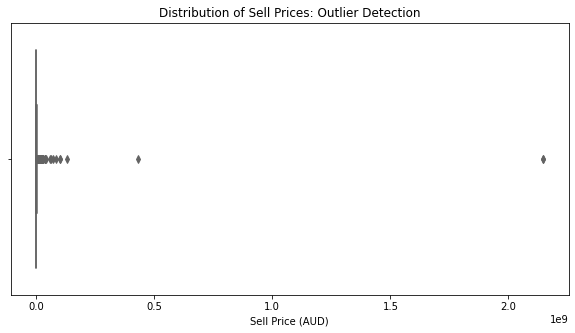

In [58]:
# Outlier visualization
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='sellPrice', color='orchid')
plt.title('Distribution of Sell Prices: Outlier Detection')
plt.xlabel('Sell Price (AUD)')
plt.show()

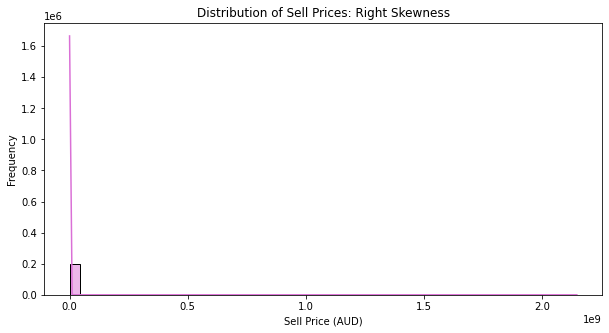

In [59]:
# Frequency distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='sellPrice', bins=50, kde=True, color='orchid')
plt.title('Distribution of Sell Prices: Right Skewness')
plt.xlabel('Sell Price (AUD)')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Mean and median prices comparisons by suburb
price_summary = (
    df.groupby('suburb')['sellPrice']
    .agg(['mean', 'median'])
    .sort_values(by='mean', ascending=False)
)

price_summary.head(10).style.format({'mean': '{:,.0f}', 'median': '{:,.0f}'})

,mean,median
suburb,,
Point Piper,"10,901,444","7,600,000"
Darling Point,"5,262,649","4,700,000"
Collaroy Beach,"4,926,500","4,900,000"
Watsons Bay,"4,612,878","2,750,000"
Woolwich,"4,526,818","4,000,000"
Bellevue Hill,"4,358,452","3,737,500"
Vaucluse,"4,355,049","3,600,000"
Concord,"4,151,231","1,410,000"
Belmore,"3,980,105","757,500"


The distribution of property prices is **highly right-skewed**. Mean prices per suburb are distant from median prices per suburb. The outliers significantly raise the mean, making it a less reliable measure of central tendency.
Therefore, using the **median selling price** provides a more robust representation of typical property values across suburbs.

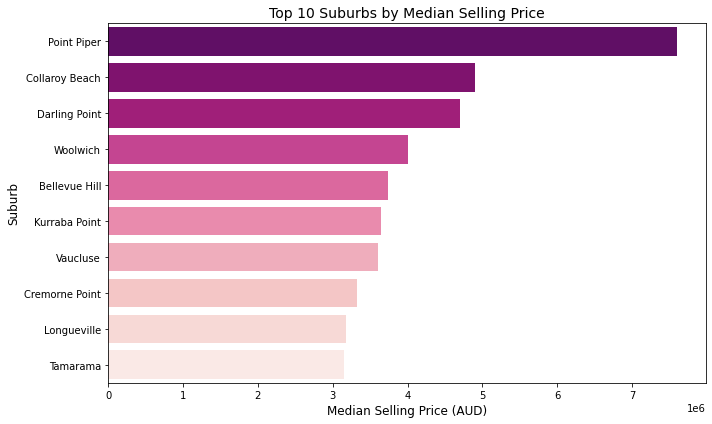

In [61]:
median_price_by_suburb = (
    df.groupby('suburb')['sellPrice']
    .median() # replace mean with median
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=median_price_by_suburb.values,
    y=median_price_by_suburb.index,
    palette='RdPu_r'
)
plt.title('Top 10 Suburbs by Median Selling Price', fontsize=14)
plt.xlabel('Median Selling Price (AUD)', fontsize=12)
plt.ylabel('Suburb', fontsize=12)
plt.tight_layout()
plt.show()

In [62]:
# Suburb with the highest median sellPrice
highest_median_suburb = (
    df.groupby('suburb')['sellPrice']
    .median() # replace mean with median
    .sort_values(ascending=False)
    .head(1)
)

suburb_name = highest_median_suburb.index[0]
median_price = highest_median_suburb.values[0]

print(f"The suburb with the highest median selling price is {suburb_name}, with an median price of ${median_price:,.0f}.")

The suburb with the highest median selling price is Point Piper, with an median price of $7,600,000.


In [63]:
# Property type with the lowest sell price
lowest_price_type = (
    df.loc[df['sellPrice'].idxmin(), ['propType', 'sellPrice']]
)

prop_type = lowest_price_type.values[0]
lowest_price = lowest_price_type.values[1]

print(f"The property type with the lowest selling price is {prop_type}, with a sell price of ${lowest_price}.")

The property type with the lowest selling price is house, with a sell price of $1.


In [64]:
# Townhouse in postal code 2107
townhouse_2107 = df[(df['propType'] == 'townhouse') & (df['postalCode'] == 2107)]

count_townhouse_2107 = len(townhouse_2107)

median_price_townhouse_2107 = townhouse_2107['sellPrice'].median()

print(f"There are {count_townhouse_2107} townhouses in postal code 2107, "
      f"with an median selling price of ${median_price_townhouse_2107:,.0f}.")

There are 25 townhouses in postal code 2107, with an median selling price of $1,350,000.


#### - Removing outliers

¿What happen if we remove outliers from the dataset?

In [88]:
# Remove outliers from DataFrame
df_without_outliers = df[(df['sellPrice'] >= lower_limit) & (df['sellPrice'] <= upper_limit)].copy()

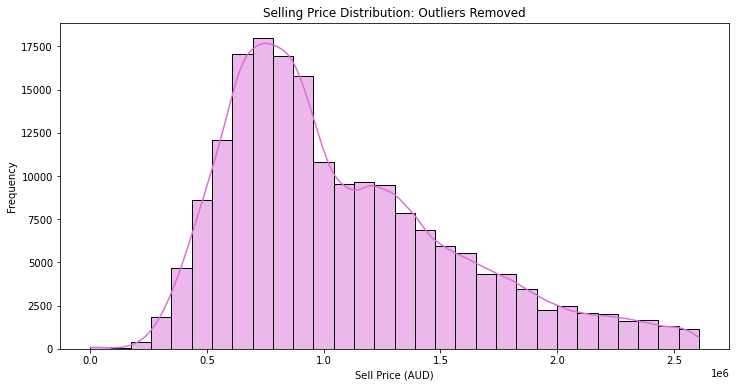

In [89]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_without_outliers, x='sellPrice', kde=True, bins=30, color='orchid')
plt.title("Selling Price Distribution: Outliers Removed")
plt.xlabel('Sell Price (AUD)')
plt.ylabel('Frequency')
plt.show()

In [90]:
mean_price = df_without_outliers['sellPrice'].mean()
median_price = df_without_outliers['sellPrice'].median()

print(f"Mean Sell Price: {mean_price:,.0f}")
print(f"Median Sell Price: {median_price:,.0f}")

Mean Sell Price: 1,078,939
Median Sell Price: 950,000


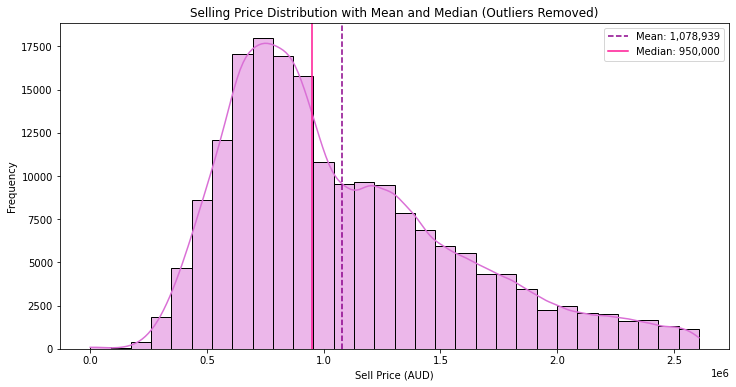

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_without_outliers, x='sellPrice', kde=True, bins=30, color='orchid')
plt.axvline(mean_price, color='darkmagenta', linestyle='--', label=f'Mean: {mean_price:,.0f}')
plt.axvline(median_price, color='deeppink', linestyle='-', label=f'Median: {median_price:,.0f}')
plt.title("Selling Price Distribution with Mean and Median (Outliers Removed)")
plt.xlabel("Sell Price (AUD)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

After removing outliers, the mean and median selling prices are much closer, but the mean remains slightly higher. This indicates a right-skewed distribution, suggesting that a few high-priced properties still pull the average upwards, even after cleaning the data.

Since the distribution remains slightly right-skewed even after removing outliers, the median is a more robust and reliable measure of central tendency. 

The median:

- Is not affected by those high residual values

- Better reflects the true center of the market

- Is more robust for comparing suburbs with different price ranges

#### - Define a function

Function Purpose:
This function takes a list of property types (e.g., House, Unit, Townhouse) and calculates the median selling price for each type using the cleaned dataset (without outliers).
It validates the input types and ensures that each requested property type exists in the dataset.

In [74]:
def median_price_by_propType(prop_list, df_without_outliers):
    """
    Calculates the median selling price for a list of property types
    using the cleaned dataset (without outliers).

    Parameters
    ----------
    prop_list : list
        List of property type names to analyze (e.g., ['House', 'Unit']).
    df_without_outliers : pandas.DataFrame
        DataFrame already cleaned from outliers, containing at least 
        'propType' and 'sellPrice' columns.

    Returns
    -------
    None
        Prints each property type with its corresponding median selling price.
    """

    # --- Validations ---
    if not isinstance(prop_list, list):
        raise TypeError("The input must be a list of property types.")

    valid_prop_types = df_without_outliers['propType'].unique()

    results = {}

    for prop in prop_list:
        # Check type
        if not isinstance(prop, str):
            raise ValueError(f"Invalid value: {prop} (must be a string).")

        # Check existence in dataset
        if prop not in valid_prop_types:
            raise ValueError(f"'{prop}' is not a valid property type. Valid types: {list(valid_prop_types)}")

        # Calculate median price for valid propType
        median_price = df_without_outliers.loc[df_without_outliers['propType'] == prop, 'sellPrice'].median()
        results[prop] = round(median_price, 2)

    print("Median selling price by property type:")
    for prop, price in results.items():
        print(f" - {prop}: ${price:,.0f}")

    #return results

In [75]:
# Property list with valid types
prop_list = ['house', 'townhouse']

median_price_by_propType(prop_list, df)

Median selling price by property type:
 - house: $1,055,000
 - townhouse: $747,500


#### - Time trends

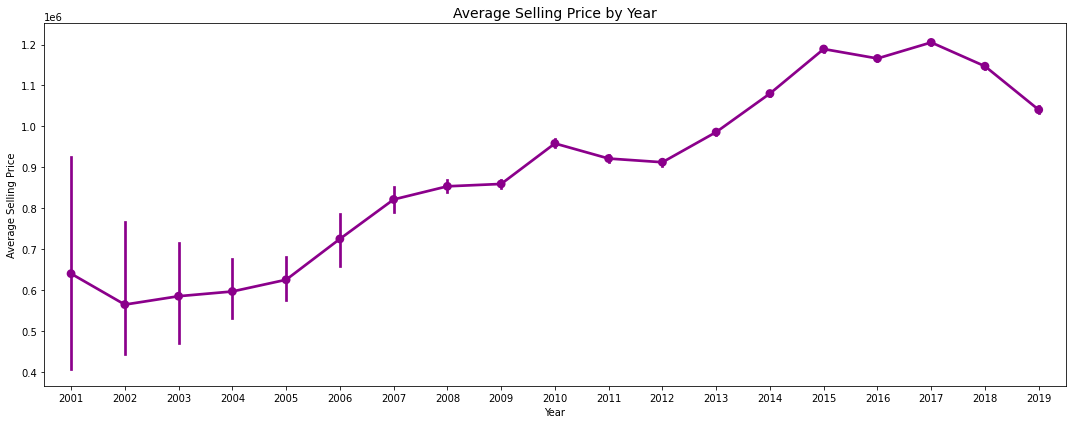

In [92]:
# New year col in df_without_outliers to plot prices by year
df_without_outliers['Year'] = df_without_outliers['Date'].dt.year

fig, ax = plt.subplots(figsize=(15, 6))

#pointplot para el average sell price
sns.pointplot(
    data=df_without_outliers,
    x="Year",
    y="sellPrice",
    color="darkmagenta",
    ax=ax
)

ax.set_title("Average Selling Price by Year", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Average Selling Price")

plt.tight_layout()
plt.show()

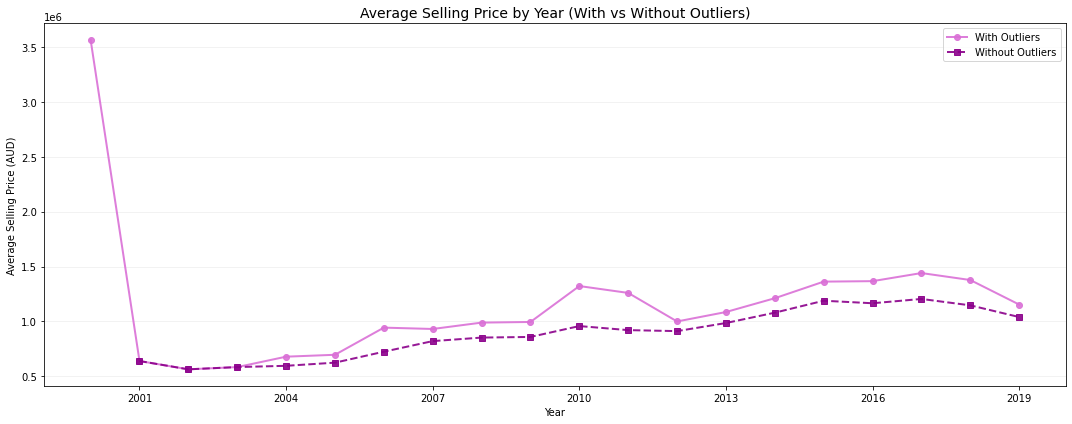

In [96]:
# Compare how averages change with and without outliers

# New year column in df to plot prices by year
df['Year'] = df['Date'].dt.year

# compute average sellPrice per year
mean_with = df.groupby('Year')['sellPrice'].mean().sort_index()
mean_without = df_without_outliers.groupby('Year')['sellPrice'].mean().sort_index()

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(mean_with.index, mean_with.values,
        marker='o', linestyle='-', color='orchid',
        label='With Outliers', linewidth=2, markersize=6, alpha=0.9)

ax.plot(mean_without.index, mean_without.values,
        marker='s', linestyle='--', color='darkmagenta',
        label='Without Outliers', linewidth=2, markersize=6, alpha=0.9)

ax.set_title("Average Selling Price by Year (With vs Without Outliers)", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Average Selling Price (AUD)")
ax.legend()
ax.grid(axis='y', alpha=0.2)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

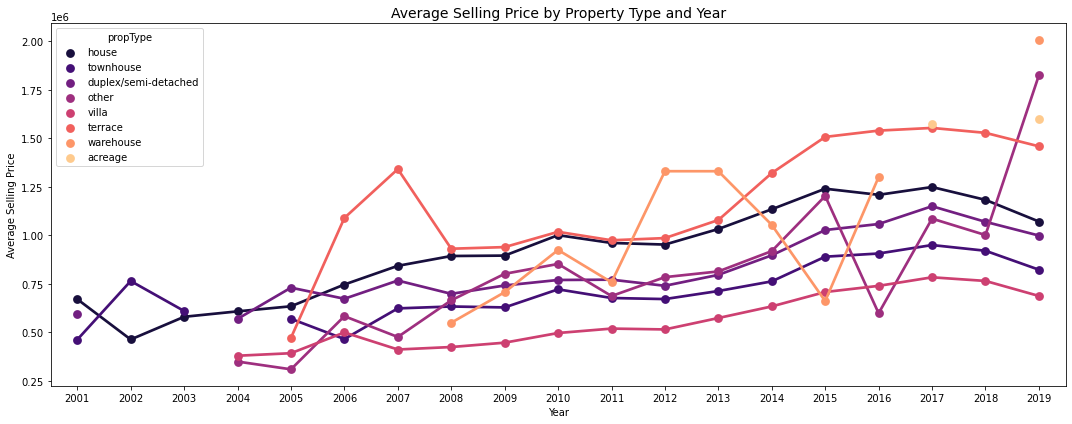

In [94]:
# Sell Price by year and property type
fig, ax = plt.subplots(figsize=(15, 6))

sns.pointplot(
    data=df_without_outliers,
    x="Year",
    y="sellPrice",
    hue="propType",
    ax=ax,
    ci=None,
    palette="magma"
)

ax.set_title("Average Selling Price by Property Type and Year", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Average Selling Price")

plt.tight_layout()
plt.show()